In [1]:
# This notebook looks at the sweep profile plot for several motifs on
# the Florida Bay food web, whose structure was downloaded from
#    http://vlado.fmf.uni-lj.si/pub/networks/data/bio/foodweb/foodweb.htm
# The sweep profile plot is obtained from the fiedler vector ordering on
# the largest connected component of the motif adjacency matrix.  Given
# the ordering, the sweep profile plots
#     (k = cardinality(Sk), motif_conductance(Sk)),
# where Sk is the set consisting of the first k nodes in the ordering.
# We see that Motif M6 has a markedly different sweep profile compared
# to other motifs.

In [2]:
# Set up the packages and data.
include("higher_order_packages.jl")
using MatrixNetworks
using MAT
using PyPlot

data = matread("data/foodweb.mat");
A = spones(data["A"]);
B = min(A, A');  # bidirectional edges                                                                                                                       
U = A - B;       # unidirectional edges  

128x128 sparse matrix with 2044 Float64 entries:
	[126,   1]  =  1.0
	[126,   2]  =  1.0
	[126,   3]  =  1.0
	[126,   4]  =  1.0
	[126,   5]  =  1.0
	[126,   6]  =  1.0
	[126,   7]  =  1.0
	[126,   8]  =  1.0
	[126,   9]  =  1.0
	[126,  10]  =  1.0
	⋮
	[114, 128]  =  1.0
	[115, 128]  =  1.0
	[116, 128]  =  1.0
	[117, 128]  =  1.0
	[118, 128]  =  1.0
	[119, 128]  =  1.0
	[120, 128]  =  1.0
	[121, 128]  =  1.0
	[122, 128]  =  1.0
	[123, 128]  =  1.0
	[124, 128]  =  1.0

In [3]:
# Form motif adjacency matrix for several types of motifs.                                                                                                  

# M_edge                                                                                                                                                    
W0 = max(A, A')

# M_5                                                                                                                                                       
T1 = (U  * U ) .* U
T2 = (U' * U ) .* U
T3 = (U  * U') .* U
W1 = T1 + T2 + T3
W1 = W1 + W1'

# M_6                                                                                                                                                       
C1 = (U * B) .* U
C1 = C1 + C1'
C2 = (U' * U) .* B
W2 = C1 + C2

# M8                                                                                                                                                        
N = size(A, 1)
W3 = zeros(size(A))
for i = 1:N
    J = find(U[i, :])
    NJ = size(J, 1)
    for j1 = 1:NJ
        for j2 = (j1+1):NJ
            k1 = J[j1]
            k2 = J[j2]
            if A[k1, k2] == 0 && A[k2, k1] == 0
               W3[i, k1]  = W3[i, k1]  + 1
               W3[i, k2]  = W3[i, k2]  + 1
               W3[k1, k2] = W3[k1, k2] + 1
            end
        end
    end
end
W3 = sparse(W3 + W3')

# M9                                                                                                                                                        
W4 = zeros(size(A))
for i = 1:N
    J1 = find(U[i, :])
    J2 = find(U[:, i])
    for j1 = 1:size(J1, 1)
        for j2 = 1:size(J2, 1)
            k1 = J1[j1]
            k2 = J2[j2]
            if A[k1, k2] == 0 && A[k2, k1] == 0
               W4[i, k1]  = W4[i, k1]  + 1
               W4[i, k2]  = W4[i, k2]  + 1
               W4[k1, k2] = W4[k1, k2] + 1
            end
        end
    end
end
W4 = sparse(W4 + W4')

128x128 sparse matrix with 9598 Float64 entries:
	[15 ,   1]  =  1.0
	[16 ,   1]  =  2.0
	[17 ,   1]  =  2.0
	[18 ,   1]  =  25.0
	[19 ,   1]  =  25.0
	[20 ,   1]  =  25.0
	[21 ,   1]  =  25.0
	[22 ,   1]  =  5.0
	[23 ,   1]  =  16.0
	[27 ,   1]  =  12.0
	⋮
	[89 , 128]  =  4.0
	[91 , 128]  =  4.0
	[100, 128]  =  6.0
	[109, 128]  =  4.0
	[110, 128]  =  4.0
	[119, 128]  =  2.0
	[122, 128]  =  4.0
	[123, 128]  =  6.0
	[124, 128]  =  7.0
	[125, 128]  =  1.0
	[126, 128]  =  3.0

In [4]:
# Run the spectral cuts                                                                                                                                     
sc0 = spectral_cut(W0);
sc1 = spectral_cut(W1);
sc2 = spectral_cut(W2);
sc3 = spectral_cut(W3);
sc4 = spectral_cut(W4);

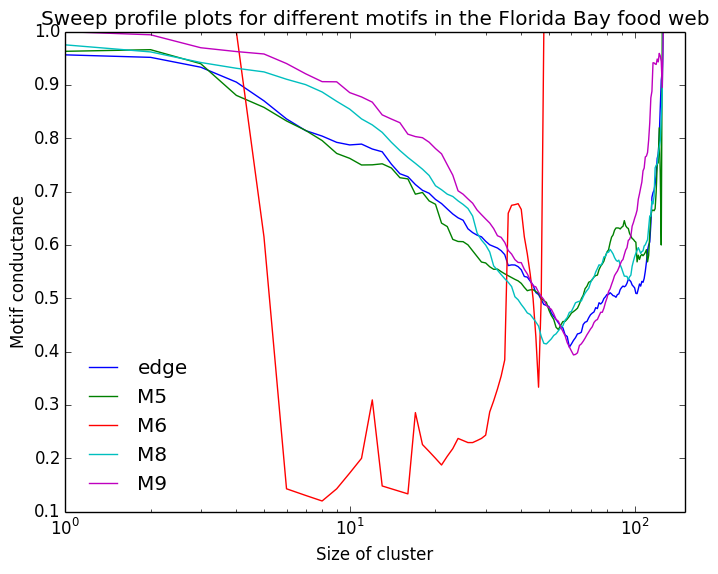

In [5]:
# Plot the sweep profiles
semilogx(sc0.sweepcut_profile.conductance);
semilogx(sc1.sweepcut_profile.conductance);
# Reverse this one to make room for legend
semilogx(reverse(sc2.sweepcut_profile.conductance));
semilogx(sc3.sweepcut_profile.conductance);
semilogx(sc4.sweepcut_profile.conductance);
xlabel("Size of cluster");
ylabel("Motif conductance");
legend(["edge", "M5", "M6", "M8", "M9"], loc="lower left", frameon=false);
title("Sweep profile plots for different motifs in the Florida Bay food web");
xlim([0, 150]);
ylim([0.1, 1.0]);